In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## OUTLIER CHECKING

<Axes: >

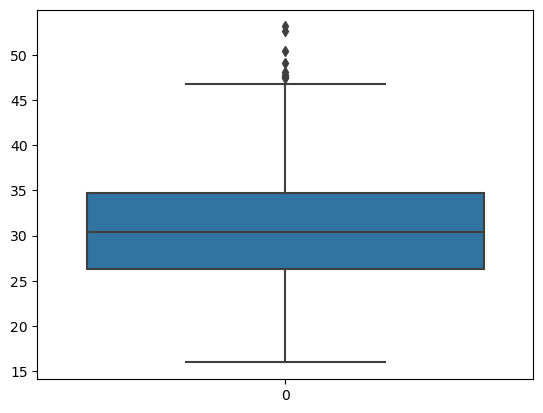

In [7]:
sns.boxplot(df.bmi)

### outlier removal by replacement with median

In [11]:
q1=df.bmi.quantile(0.25)
q3=df.bmi.quantile(0.75)

In [12]:
IQR=q3-q1

In [13]:
IQR

8.3975

In [14]:
upper_limit=q3+1.5*IQR

In [15]:
upper_limit

47.290000000000006

In [16]:
lower_limit=q1-1.5*IQR

In [17]:
lower_limit

13.7

In [18]:
df.median()

/var/folders/r4/ktl12csj7993r4p4qm508lr00000gn/T/ipykernel_8264/530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [19]:
df['bmi']=np.where(df['bmi']>upper_limit,30,df['bmi'])

In [20]:
df['bmi']

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

<Axes: >

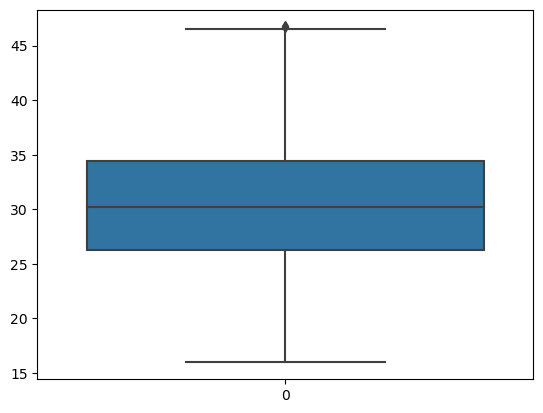

In [21]:
sns.boxplot(df.bmi)

# 1. outlier removal using IQR

<Axes: >

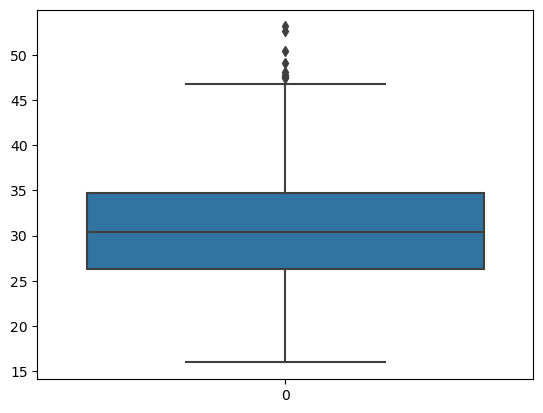

In [23]:
sns.boxplot(df.bmi)

In [24]:
q1=df.bmi.quantile(0.25)
q3=df.bmi.quantile(0.75)
IQR=q3-q1

In [25]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR

In [26]:
df=df[df.bmi<upper_limit]

<Axes: >

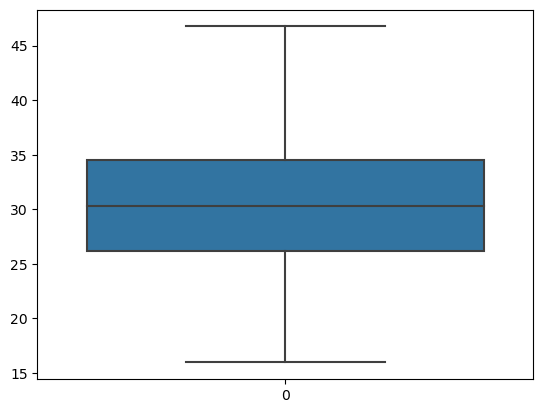

In [27]:
sns.boxplot(df.bmi)

In [28]:
df.shape

(1329, 7)